# Timeline Citation Analysis

The results of timeline citation analysis for terms 'NOTCH', 'methylation', 'CpG+clock', 'epigenetics', 'histone+modification', 'ATAC-seq' and their relation to 'aging' are presented below. Information about the number of published papers per year was obtained manually from the PubMed search. 

Search engine provides opportunity to find keyword in any field of XML description or only in the title or abstract. Difference in the results is also shown in the notebook.

## Code for Plot Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FOLDER = 'pubmed_stats_by_year'
PREFIX = 'aging+'
SUFFIX = '-titleabstract'
TERMS = ['NOTCH', 'methylation', 'CpG+clock', 'epigenetics', 'histone+modification', 'ATAC-seq']

In [3]:
def last_10_year_rows(df):
    return df[(df['year'] >= 2008) & (df['year'] <= 2018)].reset_index()

In [4]:
def join_results(term):
    term_stats = last_10_year_rows(pd.read_csv(f"{FOLDER}/{term}.csv", 
                                               skiprows=2, names=['year', 'count']))
    aging_term_stats = last_10_year_rows(pd.read_csv(f"{FOLDER}/{PREFIX}{term}.csv", 
                                                     skiprows=2, names=['year', 'count']))
    term_ta_stats = last_10_year_rows(pd.read_csv(f"{FOLDER}/{term}{SUFFIX}.csv", 
                                                  skiprows=2, names=['year', 'count']))
    aging_term_ta_stats = last_10_year_rows(pd.read_csv(f"{FOLDER}/{PREFIX}{term}{SUFFIX}.csv", 
                                                        skiprows=2, names=['year', 'count']))
    
    frames = [term_stats, aging_term_stats, term_ta_stats, aging_term_ta_stats]
    stats = pd.concat(frames, axis=1, join='inner').iloc[:, [1, 2, 5, 8, 11]]
    stats.columns = ['year', f'{term}', f'aging+{term}', f'{term}/TA', f'aging+{term}/TA']
    stats['cond'] = stats[f'aging+{term}'] / stats[f'{term}']
    stats['cond/TA'] = stats[f'aging+{term}/TA'] / stats[f'{term}/TA']
    
    return stats

In [8]:
def make_plot(data, term, use_TA=False):
    suffix = '/TA' if use_TA else ''
    title_suffix = ' - Title & Abstract' if use_TA else ''
    fig = plt.figure(figsize=(10,5))
    
#     fig.add_subplot(2, 2, 1)
#     plt.grid(linestyle='--', zorder=0)
#     plt.bar(data['year'], data[f'{term}{suffix}'], zorder=3)       
#     plt.xlabel('Year')
#     plt.ylabel('Number of Publications')
#     plt.title(f'{term}{title_suffix}')
    
#     fig.add_subplot(2, 2, 2)
#     plt.grid(linestyle='--', zorder=0)
#     plt.bar(data['year'], data[f'aging+{term}{suffix}'], zorder=3)
#     plt.xlabel('Year')
#     plt.ylabel('Number of Publications')
#     plt.title(f'aging+{term}{title_suffix}')
    
    fig.add_subplot(1, 1, 1)
    plt.plot(data['year'], data[f'cond{suffix}'])
    plt.xlabel('Год')
    plt.ylabel('Условная цитируемость')
    plt.title('Условная цитируемость')
    plt.grid(linestyle='--', zorder=-1)

    plt.tight_layout()
    plt.show()

## NOTCH - (All Fields vs Title/Abstract) search

'All fields' search results:

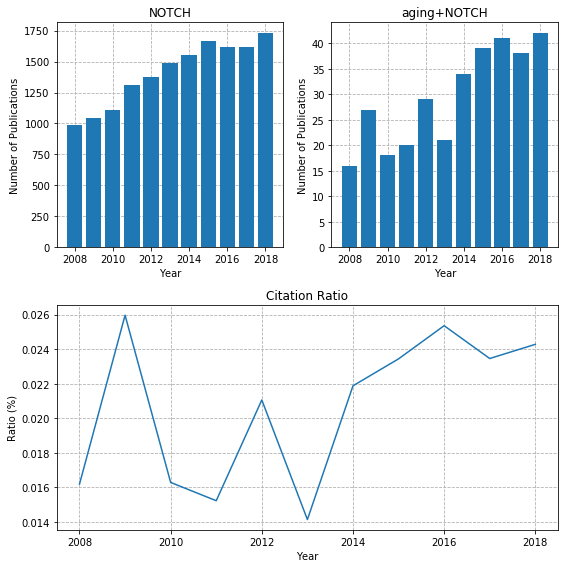

In [223]:
make_plot(join_results('NOTCH'), 'NOTCH')

'Title & Abstract' search results:

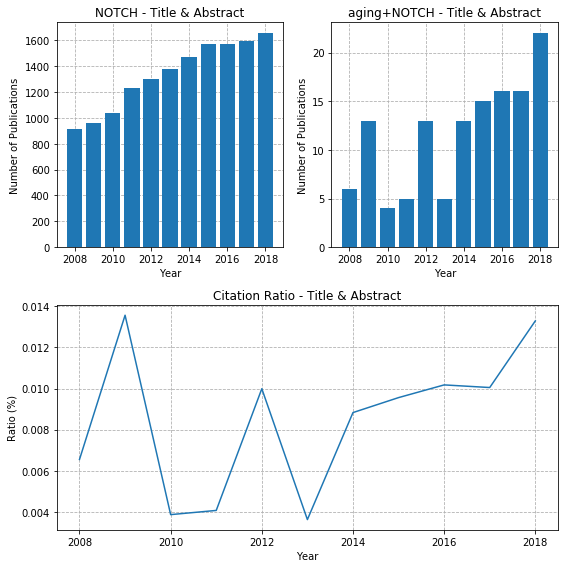

In [224]:
make_plot(join_results('NOTCH'), 'NOTCH', use_TA=True)

Constraint to search only in title & abstract can influence the peak positions.

## Methylation - All Fields

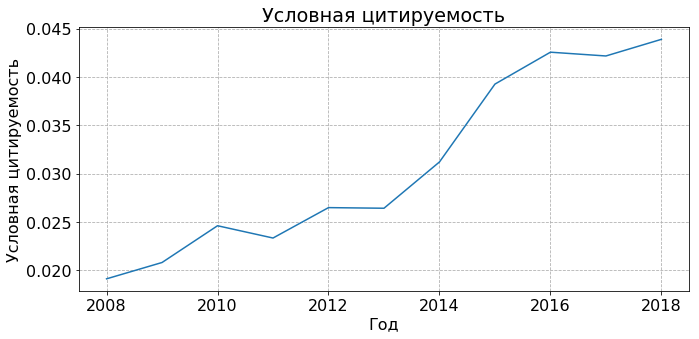

In [9]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

make_plot(join_results('methylation'), 'methylation')

## Epigenetics - All Fields

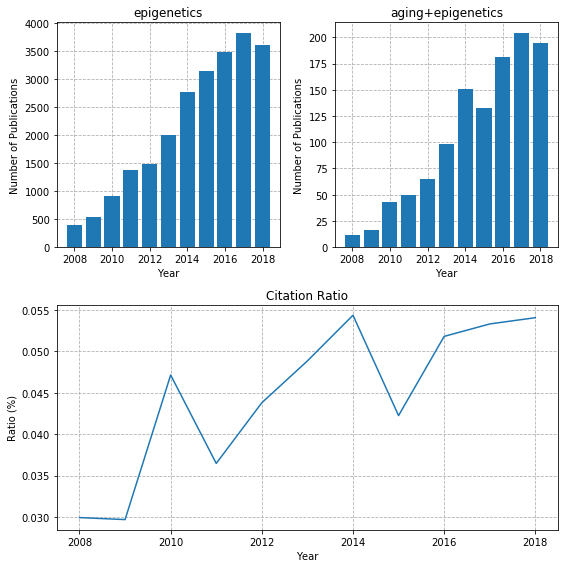

In [226]:
make_plot(join_results('epigenetics'), 'epigenetics')

## Histone Modification - All Fields

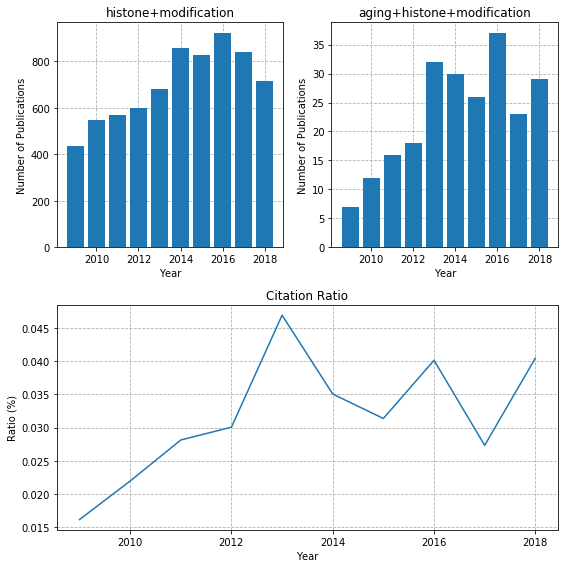

In [227]:
make_plot(join_results('histone+modification'), 'histone+modification')

## CpG clock

TODO

## ATAC-seq

TODO